In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
def Malware():
    #columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347']
    columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16','347'] 
    url='https://drive.google.com/file/d/1dIiP5NDv52ZDK2tFT3XV7S8Aarpo58MZ/view?usp=sharing'
    path='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_table(path, sep=',', header=None, index_col=None, skiprows=1,
                       names=columns)
    # Convert label.
    #df['c16'] = (df['c16'] == 1)
    return df

In [ ]:
df=Malware()
print(df)

      1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  347
0     1  1  1  1  1  1  1  1  1   1   1   1   1   1   1   1    0
1     0  1  0  1  1  0  1  1  1   0   1   0   1   1   0   0    0
2     0  1  0  1  1  1  1  0  1   0   1   0   1   1   0   1    0
3     1  1  0  1  1  1  1  0  1   0   1   0   1   1   0   0    1
4     0  1  0  1  1  1  1  0  1   0   1   0   0   0   0   1    0
...  .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ...
1495  0  1  0  1  1  1  1  0  1   0   1   0   1   1   0   1    0
1496  1  1  0  1  1  0  1  0  1   0   1   0   1   1   0   0    0
1497  0  1  0  0  1  0  0  0  0   0   1   0   0   1   0   0    0
1498  0  1  0  1  0  0  1  0  1   0   1   0   1   0   0   0    0
1499  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0    1

[1500 rows x 17 columns]


In [ ]:
feature_names = df.columns.tolist()[:-1]
print("feature_name",feature_names)

feature_name ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']


In [ ]:
train, test = train_test_split(
    df.values, test_size=int(0.1 * len(df.values)), random_state=123)
train, val = train_test_split(
    train, test_size=int(0.1 * len(df.values)), random_state=123)
Y_train = train[:, -1].copy().astype(int)
Y_val = val[:, -1].copy().astype(int)
Y_test = test[:, -1].copy().astype(int)
train = train[:, :-1].copy()
val = val[:, :-1].copy()
test = test[:, :-1].copy()
print("TRAIN",train)
print("TRAIN.SHAPE",train.shape)
print("TEST",test)
print("TEST.SHAPE",test.shape)
print("VAL",val)
print("VAL.SHAPE",val.shape)
print("yTRAIN",Y_train)
print("yTRAIN.SHAPE",Y_train.shape)
print("yTEST",Y_test)
print("yTEST.SHAPE",Y_test.shape)
print("yVAL",Y_val)
print("yVAL.SHAPE",Y_val.shape)

TRAIN [[0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]]
TRAIN.SHAPE (1200, 16)
TEST [[1 1 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 1]]
TEST.SHAPE (150, 16)
VAL [[1 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 0]
 ...
 [1 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
VAL.SHAPE (150, 16)
yTRAIN [0 0 1 ... 1 1 1]
yTRAIN.SHAPE (1200,)
yTEST [0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1]
yTEST.SHAPE (150,)
yVAL [0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 1 0 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [ ]:
# Create model
device = torch.device('cuda')
#print("device",device)
model = nn.Sequential(
    nn.Linear(len(feature_names), 512),
    nn.ELU(),
    nn.Linear(512, 512),
    nn.ELU(),
    nn.Linear(512, 1)).to(device)

# Training parameters
#print("model",model)
lr = 1e-3
mbsize = 512
max_nepochs = 250
loss_fn = nn.MSELoss()
lookback = 20
verbose = False

# Data loaders
train_set = TensorDataset(
    torch.tensor(train, dtype=torch.float32),
    torch.tensor(Y_train, dtype=torch.float32))
train_loader = DataLoader(train_set, batch_size=mbsize, shuffle=True)
val_x = torch.tensor(val, dtype=torch.float32, device=device)
val_y = torch.tensor(Y_val, dtype=torch.float32, device=device)
test_x = torch.tensor(test, dtype=torch.float32, device=device)
test_y = torch.tensor(Y_test, dtype=torch.float32, device=device)

#print("data_loaders")
#print("train_set",train_set)
#print("train_loader",train_loader)
#print("val_x",val_x)
#print("val_y",val_y)
#print("test_x",test_x)
#print("test_y",test_y)
# Setup
optimizer = optim.Adam(model.parameters(), lr=lr)
min_criterion = np.inf
min_epoch = 0
net=model


# Train
for epoch in range(max_nepochs):
    for x, y in train_loader:
        # Move to device
        x = x.to(device=device)
        y = y.to(device=device)

        # Take gradient step
        loss = loss_fn(model(x), y)
        loss.backward()
        optimizer.step()
        model.zero_grad()
        

    total=0
    correct=0
    # Check progress.
    with torch.no_grad():   
        for data in train_loader: 
          i,l=data
          #print("x ",x)
          #print("i ",i)
          outputs=net(x)
          _, predicted = torch.max(outputs.data, 1)
          total += y.size(0)
          correct += (predicted == y).sum().item()
        # Calculate validation loss.
        val_loss = loss_fn(model(val_x), val_y).item()
        if verbose:
            print('{}Epoch = {}{}'.format('-' * 10, epoch + 1, '-' * 10))
            print('Val loss = {:.4f}'.format(val_loss))

        # Check convergence criterion.
        if val_loss < min_criterion:
            min_criterion = val_loss
            min_epoch = epoch
            best_model = deepcopy(model)
        elif (epoch - min_epoch) == lookback:
            if verbose:
                print('Stopping early')
            break

    print('Accuracy : %d %%' % (100 * correct / total))

# Keep best model

#print("model",model)
model = best_model


Accuracy : 71 %
Accuracy : 63 %
Accuracy : 66 %
Accuracy : 67 %
Accuracy : 67 %


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([176])) that is different to the input size (torch.Size([176, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([150])) that is different to the input size (torch.Size([150, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(inp

Accuracy : 63 %
Accuracy : 64 %
Accuracy : 64 %
Accuracy : 68 %
Accuracy : 66 %
Accuracy : 60 %
Accuracy : 65 %
Accuracy : 61 %
Accuracy : 65 %
Accuracy : 65 %
Accuracy : 65 %
Accuracy : 69 %
Accuracy : 68 %
Accuracy : 63 %
Accuracy : 62 %
Accuracy : 63 %
Accuracy : 64 %
Accuracy : 63 %
Accuracy : 71 %
Accuracy : 67 %
Accuracy : 67 %
Accuracy : 61 %
Accuracy : 70 %
Accuracy : 59 %
Accuracy : 62 %
Accuracy : 62 %
Accuracy : 68 %
Accuracy : 69 %
Accuracy : 58 %
Accuracy : 57 %
Accuracy : 69 %
Accuracy : 62 %
Accuracy : 68 %
Accuracy : 67 %
Accuracy : 69 %
Accuracy : 63 %
Accuracy : 65 %
Accuracy : 64 %
Accuracy : 64 %
Accuracy : 67 %
Accuracy : 56 %
Accuracy : 68 %
Accuracy : 62 %
Accuracy : 69 %
Accuracy : 69 %
Accuracy : 63 %
Accuracy : 64 %
Accuracy : 68 %
Accuracy : 68 %
Accuracy : 63 %
Accuracy : 64 %
Accuracy : 67 %
Accuracy : 64 %
Accuracy : 60 %
Accuracy : 69 %
Accuracy : 65 %
Accuracy : 60 %
Accuracy : 66 %
Accuracy : 59 %
Accuracy : 63 %
Accuracy : 60 %
Accuracy : 60 %
Accuracy

In [ ]:
# Calculate performance
mean = torch.mean(train_set.tensors[1], dim=0, keepdim=True).to(device)
base_mse = nn.MSELoss()(mean.repeat(len(test_y), 1), test_y)
mse = nn.MSELoss()(model(test_x), test_y)

print('Base rate MSE = {:.2f}'.format(base_mse))
print('Model MSE = {:.2f}'.format(mse))

Base rate MSE = 0.21
Model MSE = 0.21


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([150])) that is different to the input size (torch.Size([150, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
import numpy as np
import warnings
import sys

In [ ]:
def safe_isinstance(obj, class_str):
    '''Check isinstance without requiring imports.'''
    #print("in safe is instance",class_str,str)
    if not isinstance(class_str, str):
        return False
    module_name, class_name = class_str.rsplit('.', 1)
    #print("module_name,class_name",module_name,class_name)
    if module_name not in sys.modules:
        return False
    module = sys.modules[module_name]
    class_type = getattr(module, class_name, None)
    #print("module,class_type",module,class_type)
    if class_type is None:
        return False
    return isinstance(obj, class_type)

In [ ]:
def model_conversion(model):
    '''Convert model to callable.'''
    #print("in model conversion",model)
    #print("before safe_isinstance")
    if safe_isinstance(model, 'sklearn.base.ClassifierMixin'):
        return lambda x: model.predict_proba(x)

    elif safe_isinstance(model, 'sklearn.base.RegressorMixin'):
        return lambda x: model.predict(x)

    elif safe_isinstance(model, 'catboost.CatBoostClassifier'):
        return lambda x: model.predict_proba(x)

    elif safe_isinstance(model, 'catboost.CatBoostRegressor'):
        return lambda x: model.predict(x)

    elif safe_isinstance(model, 'lightgbm.basic.Booster'):
        return lambda x: model.predict(x)

    elif safe_isinstance(model, 'xgboost.core.Booster'):
        import xgboost
        return lambda x: model.predict(xgboost.DMatrix(x))

    elif safe_isinstance(model, 'torch.nn.Module'):
        #print(" in torch.nn.module")
        #print('Setting up imputer for PyTorch model, assuming that any '
         #     'necessary output activations are applied properly. If '
          #    'not, please set up nn.Sequential with nn.Sigmoid or nn.Softmax')

        import torch
        device = next(model.parameters()).device
        return lambda x: model(torch.tensor(
            x, dtype=torch.float32, device=device)).cpu().data.numpy()

    elif callable(model):
        # Assume model is compatible function or callable object.
        return model

    else:
        raise ValueError('model cannot be converted automatically, '
                         'please convert to a lambda function')


In [ ]:
class Imputer:
    '''Imputer base class.'''
    def __init__(self, model):
        #print("in mi parent class")
        #print("model in mi",model)
        self.model = model_conversion(model)
        #print("model in mi after model_coversion",model)

    def __call__(self, x, S):
        raise NotImplementedError

class MarginalImputer(Imputer):
    #print("in mi")
    '''Marginalizing out removed features with their marginal distribution.'''
    def __init__(self, model, data):
        #print("model in MI",model)
        super().__init__(model)
        self.data = data
        self.data_repeat = data
        self.samples = len(data)
        self.num_groups = data.shape[1]
        #print("in mi,")
        #print("data",data)
        #print("len(data)",len(data))
        #print("num_grps",data.shape[1])

        if len(data) > 1024:
            warnings.warn('using {} background samples may lead to slow '
                          'runtime, consider using <= 1024'.format(
                            len(data)), RuntimeWarning)

    def __call__(self, x, S):
        # Prepare x and S.
        n = len(x)
        x = x.repeat(self.samples, 0)
        S = S.repeat(self.samples, 0)

        # Prepare samples.
        if len(self.data_repeat) != self.samples * n:
            self.data_repeat = np.tile(self.data, (n, 1))

        # Replace specified indices.
        x_ = x.copy()
        x_[~S] = self.data_repeat[~S]

        # Make predictions.
        pred = self.model(x_)
        pred = pred.reshape(-1, self.samples, *pred.shape[1:])
        return np.mean(pred, axis=1)

In [ ]:
#print("model before MI",model)
#print("train BEFORE MI",train)
imputer = MarginalImputer(model, train[:512])

In [ ]:
print(imputer)

In [ ]:
import numpy as np
from tqdm.auto import tqdm
import pickle
import numpy as np

In [ ]:
class MSELoss:
    '''MSE loss that sums over non-batch dimensions.'''
    def __init__(self, reduction='mean'):
        assert reduction in ('none', 'mean')
        self.reduction = reduction

    def __call__(self, pred, target):
        # Add dimension if necessary.
        if target.shape[-1] == 1 and len(target.shape) - len(pred.shape) == 1:
            pred = np.expand_dims(pred, -1)
        loss = np.sum(
            np.reshape((pred - target) ** 2, (len(pred), -1)), axis=1)
        if self.reduction == 'mean':
            return np.mean(loss)
        else:
            return loss


class CrossEntropyLoss:
    '''Cross entropy loss that expects probabilities.'''
    def __init__(self, reduction='mean'):
        assert reduction in ('none', 'mean')
        self.reduction = reduction

    def __call__(self, pred, target, eps=1e-12):
        # Clip.
        pred = np.clip(pred, eps, 1 - eps)

        # Add a dimension to prediction probabilities if necessary.
        if pred.ndim == 1:
            pred = pred[:, np.newaxis]
        if pred.shape[1] == 1:
            pred = np.append(1 - pred, pred, axis=1)

        # Calculate loss.
        if target.ndim == 1:
            # Class labels.
            loss = - np.log(pred[np.arange(len(pred)), target])
        elif target.ndim == 2:
            # Probabilistic labels.
            loss = - np.sum(target * np.log(pred), axis=1)
        else:
            raise ValueError('incorrect labels shape for cross entropy loss')

        if self.reduction == 'mean':
            return np.mean(loss)
        else:
            return loss

In [ ]:
def get_loss(loss, reduction='mean'):
    '''Get loss function by name.'''
    if loss == 'cross entropy':
        loss_fn = CrossEntropyLoss(reduction=reduction)
    elif loss == 'mse':
        loss_fn = MSELoss(reduction=reduction)
    else:
        raise ValueError('unsupported loss: {}'.format(loss))
    return loss_fn

In [ ]:
def dataset_output(imputer, X, batch_size):
    '''Get model output for entire dataset.'''
    Y = []
    for i in range(int(np.ceil(len(X) / batch_size))):
        x = X[i*batch_size:(i+1)*batch_size]
        pred = imputer(x, np.ones((len(x), imputer.num_groups), dtype=bool))
        Y.append(pred)
    return np.concatenate(Y)

In [ ]:
def verify_model_data(imputer, X, Y, loss, batch_size):
    '''Ensure that model and data are set up properly.'''
    check_labels = True
    if Y is None:
        print('Calculating model sensitivity (Shapley Effects, not SAGE)')
        check_labels = False
        Y = dataset_output(imputer, X, batch_size)

        # Fix output shape for classification tasks.
        if isinstance(loss, CrossEntropyLoss):
            if Y.shape == (len(X),):
                Y = Y[:, np.newaxis]
            if Y.shape[1] == 1:
                Y = np.concatenate([1 - Y, Y], axis=1)

    if isinstance(loss, CrossEntropyLoss):
        x = X[:batch_size]
        #print("Batch size: ",batch_size)
        #print("x: ",x)
        #print("Y: ",Y)
        probs = imputer(x, np.ones((len(x), imputer.num_groups), dtype=int))
        #print(probs)

        # Check labels shape.
        if check_labels:
            Y = Y.astype(int)
            if Y.shape == (len(X),):
                # This is the preferred shape.
                pass
            elif Y.shape == (len(X), 1):
                Y = Y[:, 0]
            else:
                raise ValueError('labels shape should be (batch,) or (batch, 1)'
                                 ' for cross entropy loss')

        #print("probs.ndim,probs.shape",probs.ndim,probs.shape[1])
        if (probs.ndim == 1) or (probs.shape[1] == 1):
            # Check label encoding.
            if check_labels:
                unique_labels = np.unique(Y)
                if np.array_equal(unique_labels, np.array([0, 1])):
                    # This is the preferred labeling.
                    pass
                elif np.array_equal(unique_labels, np.array([-1, 1])):
                    # Set -1 to 0.
                    Y = Y.copy()
                    Y[Y == -1] = 0
                else:
                    raise ValueError('labels for binary classification must be '
                                     '[0, 1] or [-1, 1]')

            # Check for valid probability outputs.
            valid_probs = np.all(np.logical_and(probs >= 0, probs <= 1))
            print(valid_probs)


        elif probs.ndim == 2:
            # Multiclass output, check for valid probability outputs.
            valid_probs = np.all(np.logical_and(probs >= 0, probs <= 1))
            ones = np.sum(probs, axis=1)
            valid_probs = valid_probs and np.allclose(ones, np.ones(ones.shape))

        else:
            raise ValueError('prediction has too many dimensions')

        if not valid_probs:
            raise ValueError('predictions are not valid probabilities')

    return X, Y

In [ ]:
def estimate_constraints(imputer, X, Y, batch_size, loss_fn):
    '''
    Estimate loss when no features are included and when all features are
    included. This is used to enforce constraints.
    '''
    N = 0
    mean_loss = 0
    marginal_loss = 0
    num_features = imputer.num_groups
    for i in range(np.ceil(len(X) / batch_size).astype(int)):
        x = X[i * batch_size:(i + 1) * batch_size]
        y = Y[i * batch_size:(i + 1) * batch_size]
        N += len(x)

        # All features.
        pred = imputer(x, np.ones((len(x), num_features), dtype=bool))
        loss = loss_fn(pred, y)
        mean_loss += np.sum(loss - mean_loss) / N

        # No features.
        pred = imputer(x, np.zeros((len(x), num_features), dtype=bool))
        loss = loss_fn(pred, y)
        marginal_loss += np.sum(loss - marginal_loss) / N

    return - marginal_loss, - mean_loss

In [ ]:
def calculate_A(num_features):
    '''Calculate A parameter's exact form.'''
    p_coaccur = (
        (np.sum((np.arange(2, num_features) - 1) / (num_features - np.arange(2, num_features)))) /
        (num_features * (num_features - 1) *
         np.sum(1 / (np.arange(1, num_features) * (num_features - np.arange(1, num_features))))))
    A = np.eye(num_features) * 0.5 + (1 - np.eye(num_features)) * p_coaccur
    return A

In [ ]:
def calculate_result(A, b, v0, v1, b_sum_squares, n):
    '''Calculate regression coefficients and uncertainty estimates.'''
    num_features = A.shape[1]
    A_inv_one = np.linalg.solve(A, np.ones(num_features))
    A_inv_vec = np.linalg.solve(A, b)
    values = (
        A_inv_vec -
        A_inv_one * (np.sum(A_inv_vec) - v1 + v0) / np.sum(A_inv_one))

    # Calculate variance.
    try:
        b_sum_squares = 0.5 * (b_sum_squares + b_sum_squares.T)
        b_cov = b_sum_squares / (n ** 2)
        # TODO this fails in situations where model is invariant to features.
        cholesky = np.linalg.cholesky(b_cov)
        L = (
            np.linalg.solve(A, cholesky) +
            np.matmul(np.outer(A_inv_one, A_inv_one), cholesky) / np.sum(A_inv_one))
        beta_cov = np.matmul(L, L.T)
        var = np.diag(beta_cov)
        std = var ** 0.5
    except np.linalg.LinAlgError:
        # b_cov likely is not PSD due to insufficient samples.
        std = np.ones(num_features) * np.nan
    print("**Values**",values)
    return values, std

In [ ]:

def pplot(explanation,
         feature_names=None,
         sort_features=True,
         max_features=np.inf,
         orientation='horizontal',
         error_bars=True,
         confidence_level=0.95,
         capsize=5,
         color='tab:green',
         title='Feature Importance',
         title_size=20,
         tick_size=16,
         tick_rotation=None,
         label_size=16,
         figsize=(10, 7),
         return_fig=False):
    '''
    Plot SAGE values.
    Args:
      explanation: Explanation object.
      feature_names: list of feature names.
      sort_features: whether to sort features by their values.
      max_features: number of features to display.
      orientation: horizontal (default) or vertical.
      error_bars: whether to include standard deviation error bars.
      confidence_level: confidence interval coverage (e.g., 95%).
      capsize: error bar cap width.
      color: bar chart color.
      title: plot title.
      title_size: font size for title.
      tick_size: font size for feature names and numerical values.
      tick_rotation: tick rotation for feature names (vertical plots only).
      label_size: font size for label.
      figsize: figure size (if fig is None).
      return_fig: whether to return matplotlib figure object.
    '''
    # Default feature names.
    if feature_names is None:
        feature_names = ['Feature {}'.format(i) for i in
                         range(len(explanation.values))]
    else:
        if isinstance(feature_names, list):
            feature_names = np.array(feature_names)

    # Sort features if necessary.
    if len(feature_names) > max_features:
        sort_features = True

    # Perform sorting.
    values = explanation.values
    std = explanation.std
    if sort_features:
        argsort = np.argsort(values)[::-1]
        values = values[argsort]
        std = std[argsort]
        feature_names = feature_names[argsort]

    # Remove extra features if necessary.
    if len(feature_names) > max_features:
        feature_names = (list(feature_names[:max_features])
                         + ['Remaining Features'])
        values = (list(values[:max_features])
                  + [np.sum(values[max_features:])])
        std = (list(std[:max_features])
               + [np.sum(std[max_features:] ** 2) ** 0.5])

    # Warn if too many features.
    if len(feature_names) > 50:
        warnings.warn('Plotting {} features may make figure too crowded, '
                      'consider using max_features'.format(
                        len(feature_names)), Warning)

    # Discard std if necessary.
    if not error_bars:
        std = None
    else:
        assert 0 < confidence_level < 1
        std = std * norm.ppf(0.5 + confidence_level / 2)

    # Make plot.
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()

    if orientation == 'horizontal':
        # Bar chart.
        ax.barh(np.arange(len(feature_names))[::-1], values,
                color=color, xerr=std, capsize=capsize)

        # Feature labels.
        if tick_rotation is not None:
            raise ValueError('rotation not supported for horizontal charts')
        ax.set_yticks(np.arange(len(feature_names))[::-1])
        ax.set_yticklabels(feature_names, fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('')
        ax.set_xlabel('{} value'.format(explanation.explanation_type),
                      fontsize=label_size)
        ax.tick_params(axis='x', labelsize=tick_size)

    elif orientation == 'vertical':
        # Bar chart.
        ax.bar(np.arange(len(feature_names)), values, color=color,
               yerr=std, capsize=capsize)

        # Feature labels.
        if tick_rotation is None:
            tick_rotation = 45
        if tick_rotation < 90:
            ha = 'right'
            rotation_mode = 'anchor'
        else:
            ha = 'center'
            rotation_mode = 'default'
        ax.set_xticks(np.arange(len(feature_names)))
        ax.set_xticklabels(feature_names, rotation=tick_rotation, ha=ha,
                           rotation_mode=rotation_mode,
                           fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('{} value'.format(explanation.explanation_type),
                      fontsize=label_size)
        ax.set_xlabel('')
        ax.tick_params(axis='y', labelsize=tick_size)

    else:
        raise ValueError('orientation must be horizontal or vertical')

    # Remove spines.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title(title, fontsize=title_size)
    plt.tight_layout()

    if return_fig:
        return fig
    else:
        return

In [ ]:

def comparison_plot(comparison_explanations,
                    comparison_names=None,
                    feature_names=None,
                    sort_features=True,
                    max_features=np.inf,
                    orientation='vertical',
                    error_bars=True,
                    confidence_level=0.95,
                    capsize=5,
                    colors=('tab:green', 'tab:blue'),
                    title='Feature Importance Comparison',
                    title_size=20,
                    tick_size=16,
                    tick_rotation=None,
                    label_size=16,
                    legend_loc=None,
                    figsize=(10, 7),
                    return_fig=False):
    '''
    Plot comparison between two different Explanation objects.
    Args:
      comparison_explanations: tuple of Explanation objects to be compared.
      comparison_names: tuple of names for each Explanation object.
      feature_names: list of feature names.
      sort_features: whether to sort features by their SAGE values.
      max_features: number of features to display.
      orientation: horizontal (default) or vertical.
      error_bars: whether to include standard deviation error bars.
      confidence_level: confidence interval coverage (e.g., 95%).
      capsize: error bar cap width.
      colors: colors for each set of SAGE values.
      title: plot title.
      title_size: font size for title.
      tick_size: font size for feature names and numerical values.
      tick_rotation: tick rotation for feature names (vertical plots only).
      label_size: font size for label.
      legend_loc: legend location.
      figsize: figure size (if fig is None).
      return_fig: whether to return matplotlib figure object.
    '''
    # Default feature names.
    if feature_names is None:
        feature_names = ['Feature {}'.format(i) for i in
                         range(len(comparison_explanations[0].values))]
    else:
        if isinstance(feature_names, list):
            feature_names = np.array(feature_names)

    # Default comparison names.
    num_comps = len(comparison_explanations)
    if num_comps not in (2, 3, 4, 5):
        raise ValueError('only support comparisons for 2-5 explanations')
    if comparison_names is None:
        comparison_names = ['Explanation {}'.format(i) for i in
                            range(num_comps)]

    # Default colors.
    if colors is None:
        colors = ['tab:green', 'tab:blue', 'tab:purple',
                  'tab:orange', 'tab:pink'][:num_comps]

    # Determine explanation type.
    unique_types = np.unique([explanation.explanation_type
                              for explanation in comparison_explanations])
    if len(unique_types) == 1:
        explanation_type = unique_types[0]
    else:
        explanation_type = 'Importance'

    # Sort features if necessary.
    if len(feature_names) > max_features:
        sort_features = True

    # Extract values.
    values = [sage_values.values for sage_values in comparison_explanations]
    std = [sage_values.std for sage_values in comparison_explanations]

    # Perform sorting.
    if sort_features:
        argsort = np.argsort(values[0])[::-1]
        values = [sage_values[argsort] for sage_values in values]
        std = [stddev[argsort] for stddev in std]
        feature_names = feature_names[argsort]

    # Remove extra features if necessary.
    if len(feature_names) > max_features:
        feature_names = (list(feature_names[:max_features])
                         + ['Remaining Features'])
        values = [
            list(sage_values[:max_features])
            + [np.sum(sage_values[max_features:])]
            for sage_values in values]
        std = [list(stddev[:max_features])
               + [np.sum(stddev[max_features:] ** 2) ** 0.5]
               for stddev in std]

    # Warn if too many features.
    if len(feature_names) > 50:
        warnings.warn('Plotting {} features may make figure too crowded, '
                      'consider using max_features'.format(
                        len(feature_names)), Warning)

    # Discard std if necessary.
    if not error_bars:
        std = [None for _ in std]
    else:
        assert 0 < confidence_level < 1
        std = [stddev * norm.ppf(0.5 + confidence_level / 2) for stddev in std]

    # Make plot.
    width = 0.8 / num_comps
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()

    if orientation == 'horizontal':
        # Bar chart.
        enumeration = enumerate(zip(values, std, comparison_names, colors))
        for i, (sage_values, stddev, name, color) in enumeration:
            pos = - 0.4 + width / 2 + width * i
            ax.barh(np.arange(len(feature_names))[::-1] - pos,
                    sage_values, height=width, color=color, xerr=stddev,
                    capsize=capsize, label=name)

        # Feature labels.
        if tick_rotation is not None:
            raise ValueError('rotation not supported for horizontal charts')
        ax.set_yticks(np.arange(len(feature_names))[::-1])
        ax.set_yticklabels(feature_names, fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('')
        ax.set_xlabel('{} value'.format(explanation_type), fontsize=label_size)
        ax.tick_params(axis='x', labelsize=tick_size)

    elif orientation == 'vertical':
        # Bar chart.
        enumeration = enumerate(zip(values, std, comparison_names, colors))
        for i, (sage_values, stddev, name, color) in enumeration:
            pos = - 0.4 + width / 2 + width * i
            ax.bar(np.arange(len(feature_names)) + pos,
                   sage_values, width=width, color=color, yerr=stddev,
                   capsize=capsize, label=name)

        # Feature labels.
        if tick_rotation is None:
            tick_rotation = 45
        if tick_rotation < 90:
            ha = 'right'
            rotation_mode = 'anchor'
        else:
            ha = 'center'
            rotation_mode = 'default'
        ax.set_xticks(np.arange(len(feature_names)))
        ax.set_xticklabels(feature_names, rotation=tick_rotation, ha=ha,
                           rotation_mode=rotation_mode,
                           fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('{} value'.format(explanation_type), fontsize=label_size)
        ax.set_xlabel('')
        ax.tick_params(axis='y', labelsize=tick_size)

    # Remove spines.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend(loc=legend_loc, fontsize=label_size)
    ax.set_title(title, fontsize=title_size)
    plt.tight_layout()

    if return_fig:
        return fig
    else:
        return


In [ ]:
def pplot_sign(explanation,
              feature_names,
              sort_features=True,
              max_features=np.inf,
              orientation='horizontal',
              confidence_level=0.95,
              capsize=5,
              title='Feature Importance Sign',
              title_size=20,
              tick_size=16,
              tick_rotation=None,
              label_size=16,
              figsize=(10, 7),
              return_fig=False):
    '''
    Plot SAGE values, focusing on their sign.
    Args:
      explanation: Explanation object.
      feature_names: list of feature names.
      sort_features: whether to sort features by their SAGE values.
      max_features: number of features to display.
      orientation: horizontal (default) or vertical.
      confidence_level: confidence interval coverage (e.g., 95%).
      capsize: error bar cap width.
      title: plot title.
      title_size: font size for title.
      tick_size: font size for feature names and numerical values.
      tick_rotation: tick rotation for feature names (vertical plots only).
      label_size: font size for label.
      figsize: figure size (if fig is None).
      return_fig: whether to return matplotlib figure object.
    '''
    # Default feature names.
    if feature_names is None:
        feature_names = ['Feature {}'.format(i) for i in
                         range(len(explanation.values))]
    else:
        if isinstance(feature_names, list):
            feature_names = np.array(feature_names)

    # Find confidence interval width.
    values = explanation.values
    std = explanation.std
    assert 0 < confidence_level < 1
    std = std * norm.ppf(0.5 + confidence_level / 2)

    # Set colors.
    colors = []
    for val, width in zip(values, std):
        if val > 0 and val - width > 0:
            colors.append('tab:green')
        elif val < 0 and val + width < 0:
            colors.append('tab:red')
        else:
            colors.append('tab:blue')
    colors = np.array(colors)

    # Sort features if necessary.
    if len(feature_names) > max_features:
        sort_features = True

    # Remove extra features if necessary.
    if len(feature_names) > max_features:
        # Sort by magnitude.
        argsort = np.argsort(np.abs(values))[::-1]
        values = values[argsort]
        std = std[argsort]
        feature_names = feature_names[argsort]
        colors = colors[argsort]

        # Keep highest magnitude features.
        new_value = np.sum(values[max_features:])
        new_std = np.sum(std[max_features:] ** 2) ** 0.5
        values = np.array(list(values[:max_features]) + [new_value])
        std = np.array(list(std[:max_features]) + [new_std])
        colors = np.array(list(colors[:max_features]) + ['tab:purple'])
        feature_names = np.array(list(feature_names[:max_features])
                                 + ['Remaining Features'])

    # Perform sorting.
    if sort_features:
        argsort = np.argsort(values)[::-1]
        values = values[argsort]
        std = std[argsort]
        feature_names = feature_names[argsort]
        colors = colors[argsort]

    # Warn if too many features.
    if len(feature_names) > 50:
        warnings.warn('Plotting {} features may make figure too crowded, '
                      'consider using max_features'.format(
                        len(feature_names)), Warning)

    # Make plot.
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()

    if orientation == 'horizontal':
        # Bar chart.
        ax.barh(np.arange(len(feature_names))[::-1], std,
                left=values - std, color=colors, edgecolor='black',
                linewidth=0.5)
        ax.barh(np.arange(len(feature_names))[::-1], std,
                left=values, color=colors, edgecolor='black',
                linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)

        # Feature labels.
        if tick_rotation is not None:
            raise ValueError('rotation not supported for horizontal charts')
        ax.set_yticks(np.arange(len(feature_names))[::-1])
        ax.set_yticklabels(feature_names, fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('')
        ax.set_xlabel('{} value'.format(explanation.explanation_type),
                      fontsize=label_size)
        ax.tick_params(axis='x', labelsize=tick_size)

    elif orientation == 'vertical':
        # Bar chart.
        ax.bar(np.arange(len(feature_names)), std, bottom=values - std,
               color=colors, edgecolor='black', linewidth=0.5)
        ax.bar(np.arange(len(feature_names)), std, bottom=values,
               color=colors, edgecolor='black', linewidth=0.5)
        ax.axhline(0, color='black', linewidth=0.5)

        # Feature labels.
        if tick_rotation is None:
            tick_rotation = 45
        if tick_rotation < 90:
            ha = 'right'
            rotation_mode = 'anchor'
        else:
            ha = 'center'
            rotation_mode = 'default'
        ax.set_xticks(np.arange(len(feature_names)))
        ax.set_xticklabels(feature_names, rotation=tick_rotation, ha=ha,
                           rotation_mode=rotation_mode,
                           fontsize=label_size)

        # Axis labels and ticks.
        ax.set_ylabel('{} value'.format(explanation.explanation_type),
                      fontsize=label_size)
        ax.set_xlabel('')
        ax.tick_params(axis='y', labelsize=tick_size)

    else:
        raise ValueError('orientation must be horizontal or vertical')

    # Remove spines.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title(title, fontsize=title_size)
    plt.tight_layout()

    if return_fig:
        return fig
    else:
        return

In [ ]:
class Explanation:
    '''For storing and plotting Explanations.'''
    def __init__(self, values, std, explanation_type='SAGE'):
        self.values = values
        self.std = std
        self.explanation_type = explanation_type

    def plot(self,
             feature_names=None,
             sort_features=True,
             max_features=np.inf,
             orientation='horizontal',
             error_bars=True,
             confidence_level=0.95,
             capsize=5,
             color='tab:green',
             title='Feature Importance',
             title_size=20,
             tick_size=16,
             tick_rotation=None,
             label_size=16,
             figsize=(10, 7),
             return_fig=False):
        '''
        Plot SAGE values.
        Args:
          feature_names: list of feature names.
          sort_features: whether to sort features by their SAGE values.
          max_features: number of features to display.
          orientation: horizontal (default) or vertical.
          error_bars: whether to include standard deviation error bars.
          confidence_level: confidence interval coverage (e.g., 95%).
          capsize: error bar cap width.
          color: bar chart color.
          title: plot title.
          title_size: font size for title.
          tick_size: font size for feature names and numerical values.
          tick_rotation: tick rotation for feature names (vertical plots only).
          label_size: font size for label.
          figsize: figure size (if fig is None).
          return_fig: whether to return matplotlib figure object.
        '''
        return pplot(
            self, feature_names, sort_features, max_features, orientation,
            error_bars, confidence_level, capsize, color, title, title_size,
            tick_size, tick_rotation, label_size, figsize, return_fig)

    def comparison(self,
                   other_values,
                   comparison_names=None,
                   feature_names=None,
                   sort_features=True,
                   max_features=np.inf,
                   orientation='vertical',
                   error_bars=True,
                   confidence_level=0.95,
                   capsize=5,
                   colors=None,
                   title='Feature Importance Comparison',
                   title_size=20,
                   tick_size=16,
                   tick_rotation=None,
                   label_size=16,
                   legend_loc=None,
                   figsize=(10, 7),
                   return_fig=False):
        '''
        Plot comparison with another set of SAGE values.
        Args:
          other_values: another SAGE values object.
          comparison_names: tuple of names for each SAGE value object.
          feature_names: list of feature names.
          sort_features: whether to sort features by their SAGE values.
          max_features: number of features to display.
          orientation: horizontal (default) or vertical.
          error_bars: whether to include standard deviation error bars.
          confidence_level: confidence interval coverage (e.g., 95%).
          capsize: error bar cap width.
          colors: colors for each set of SAGE values.
          title: plot title.
          title_size: font size for title.
          tick_size: font size for feature names and numerical values.
          tick_rotation: tick rotation for feature names (vertical plots only).
          label_size: font size for label.
          legend_loc: legend location.
          figsize: figure size (if fig is None).
          return_fig: whether to return matplotlib figure object.
        '''
        return comparison_plot(
            (self, other_values), comparison_names, feature_names,
            sort_features, max_features, orientation, error_bars,
            confidence_level, capsize, colors, title, title_size, tick_size,
            tick_rotation, label_size, legend_loc, figsize, return_fig)

    def plot_sign(self,
                  feature_names,
                  sort_features=True,
                  max_features=np.inf,
                  orientation='horizontal',
                  confidence_level=0.95,
                  capsize=5,
                  title='Feature Importance Sign',
                  title_size=20,
                  tick_size=16,
                  tick_rotation=None,
                  label_size=16,
                  figsize=(10, 7),
                  return_fig=False):
        '''
        Plot SAGE values, focusing on their sign.
        Args:
          feature_names: list of feature names.
          sort_features: whether to sort features by their SAGE values.
          max_features: number of features to display.
          orientation: horizontal (default) or vertical.
          confidence_level: confidence interval coverage (e.g., 95%).
          capsize: error bar cap width.
          title: plot title.
          title_size: font size for title.
          tick_size: font size for feature names and numerical values.
          tick_rotation: tick rotation for feature names (vertical plots only).
          label_size: font size for label.
          figsize: figure size (if fig is None).
          return_fig: whether to return matplotlib figure object.
        '''
        return pplot_sign(
            self, feature_names, sort_features, max_features, orientation,
            confidence_level, capsize, title, title_size, tick_size,
            tick_rotation, label_size, figsize, return_fig)

    def save(self, filename):
        '''Save Explanation object.'''
        if isinstance(filename, str):
            with open(filename, 'wb') as f:
                pickle.dump(self, f)
        else:
            raise TypeError('filename must be str')

    def __repr__(self):
        with np.printoptions(precision=2, threshold=12, floatmode='fixed'):
            return '{} Explanation(\n  (Mean): {}\n  (Std):  {}\n)'.format(
                self.explanation_type, self.values, self.std)



In [ ]:
class KernelEstimator:
    '''
    Estimate SAGE values by fitting weighted linear model.
    This is an unbiased estimator designed for stochastic cooperative games,
    described in https://arxiv.org/abs/2012.01536
    Args:
      imputer: model that accommodates held out features.
      loss: loss function ('mse', 'cross entropy').
    '''
    def __init__(self, imputer, loss):
        self.imputer = imputer
        self.loss_fn = get_loss(loss, reduction='none')

    def __call__(self,X,Y=None,batch_size=512,detect_convergence=True,thresh=0.01,n_samples=None,verbose=False,bar=True,check_every=5):
        '''
        Estimate SAGE values by fitting linear regression model.
        Args:
          X: input data.
          Y: target data. If None, model output will be used.
          batch_size: number of examples to be processed in parallel, should be
            set to a large value.
          detect_convergence: whether to stop when approximately converged.
          thresh: threshold for determining convergence.
          n_samples: number of permutations to unroll.
          verbose: print progress messages.
          bar: display progress bar.
          check_every: number of batches between convergence checks.
        The default behavior is to detect convergence based on the width of the
        SAGE values' confidence intervals. Convergence is defined by the ratio
        of the maximum standard deviation to the gap between the largest and
        smallest values.
        Returns: Explanation object.
        '''
        # Determine explanation type.
        if Y is not None:
            explanation_type = 'SAGE'
        else:
            explanation_type = 'Shapley Effects'

        # Verify model.
        N, _ = X.shape
        num_features = self.imputer.num_groups
        X, Y = verify_model_data(
            self.imputer, X, Y, self.loss_fn, batch_size)

        # Possibly force convergence detection.
        if n_samples is None:
            n_samples = 1e20
            if not detect_convergence:
                detect_convergence = True
                if verbose:
                    print('Turning convergence detection on')

        if detect_convergence:
            assert 0 < thresh < 1

        # Weighting kernel (probability of each subset size).
        weights = np.arange(1, num_features)
        weights = 1 / (weights * (num_features - weights))
        weights = weights / np.sum(weights)

        # Estimate v({}) and v(D) for constraints.
        v0, v1 = estimate_constraints(
            self.imputer, X, Y, batch_size, self.loss_fn)

        # Set up bar.
        n_loops = int(n_samples / batch_size)
        if bar:
            if detect_convergence:
                bar = tqdm(total=1)
            else:
                bar = tqdm(total=n_loops * batch_size)

        # Setup.
        A = calculate_A(num_features)
        n = 0
        b = 0
        b_sum_squares = 0

        # Sample subsets.
        for it in range(n_loops):
            # Sample data.
            mb = np.random.choice(N, batch_size)
            x = X[mb]
            y = Y[mb]

            # Sample subsets.
            S = np.zeros((batch_size, num_features), dtype=bool)
            num_included = np.random.choice(num_features - 1, size=batch_size,
                                            p=weights) + 1
            for row, num in zip(S, num_included):
                inds = np.random.choice(num_features, size=num, replace=False)
                row[inds] = 1

            # Calculate loss.
            y_hat = self.imputer(x, S)
            loss = - self.loss_fn(y_hat, y) - v0
            b_orig = S.astype(float) * loss[:, np.newaxis]

            # Calculate loss with inverted subset (for variance reduction).
            S = np.logical_not(S)
            y_hat = self.imputer(x, S)
            loss = - self.loss_fn(y_hat, y) - v0
            b_inv = S.astype(float) * loss[:, np.newaxis]

            # Welford's algorithm.
            n += batch_size
            b_sample = 0.5 * (b_orig + b_inv)
            b_diff = b_sample - b
            b += np.sum(b_diff, axis=0) / n
            b_diff2 = b_sample - b
            b_sum_squares += np.sum(
                np.matmul(np.expand_dims(b_diff, 2),
                          np.expand_dims(b_diff2, 1)), axis=0)

            # Update bar (if not detecting convergence).
            if bar and (not detect_convergence):
                bar.update(batch_size)

            if (it + 1) % check_every == 0:
                # Calculate progress.
                values, std = calculate_result(
                    A, b, v0, v1, b_sum_squares, n)
                gap = max(values.max() - values.min(), 1e-12)
                ratio = std.max() / gap

                # Print progress message.
                if verbose:
                    if detect_convergence:
                        print('StdDev Ratio = {:.4f} (Converge at {:.4f})'.format(
                            ratio, thresh))
                    else:
                        print('StdDev Ratio = {:.4f}'.format(ratio))

                # Check for convergence.
                if detect_convergence:
                    if ratio < thresh:
                        if verbose:
                            print('Detected convergence')

                        # Skip bar ahead.
                        if bar:
                            bar.n = bar.total
                            bar.refresh()
                        break

                # Update convergence estimation.
                if bar and detect_convergence:
                    N_est = (it + 1) * (ratio / thresh) ** 2
                    bar.n = np.around((it + 1) / N_est, 4)
                    bar.refresh()

        # Calculate SAGE values.
        values, std = calculate_result(A, b, v0, v1, b_sum_squares, n)

        return Explanation(np.squeeze(values), std, explanation_type)

In [ ]:
estimator = KernelEstimator(imputer, 'cross entropy')
print(estimator)

In [ ]:
print(train)
sage_train = estimator(train, Y_train, thresh=0.025)

[[0 1 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]]
True


**Values** [ 8.12785320e-04 -2.47470339e-03  2.97138381e-04  9.56476005e-04
 -1.13327068e-03 -6.51648630e-04  2.50948514e-04  5.46763626e-05
  4.55078631e-03 -2.66983184e-05 -3.40191027e-04  6.00218609e-04
 -2.00713637e-04  2.13304769e-03  6.37345200e-04  8.13190232e-04]
**Values** [ 2.97405161e-04 -2.44611170e-03  3.80950653e-04  1.02593546e-03
 -5.84054413e-04 -5.48159149e-04  4.87871507e-04 -7.33816688e-05
  4.08526037e-03  2.69820541e-04  9.00562059e-06  2.75134016e-04
 -3.88824248e-04  2.35036113e-03  2.23447744e-04  9.14725921e-04]
**Values** [ 4.54461231e-04 -2.33750893e-03  9.98400034e-05  9.55317628e-04
 -5.49166647e-04 -9.61396374e-04  4.56389450e-04  2.43806978e-04
  4.40408997e-03 -5.58615386e-05  5.75421951e-06  2.28303777e-04
 -2.77260819e-04  2.35176319e-03  2.33859580e-04  1.02699523e-03]
**Values** [ 4.24684632e-04 -2.04376179e-03  1.43727165e-04  9.95271567e-04
 -4.36105936e-04 -9.48300818e-04  4.78286153e-04  2.33393725e-04
  4.20137828e-03 -3.11848153e-05 -2.9791357

In [ ]:
sage_val = estimator(val, Y_val, thresh=0.025)

True


**Values** [ 4.94312403e-04 -8.76801460e-04 -6.65661091e-06  1.04546124e-04
 -6.79467544e-04 -8.80524394e-04  4.49943481e-04  2.78525015e-04
  2.43173580e-03 -1.61975383e-05  9.17216703e-05 -2.61514531e-04
  1.97408184e-04  2.75157035e-03  6.73413303e-04  6.68517970e-04]
**Values** [ 5.69932128e-04 -6.80309050e-04 -1.18018930e-04  2.95169898e-04
 -3.46996011e-04 -5.89104611e-04  5.39842728e-04  1.80111537e-04
  2.71772609e-03  1.33708631e-05 -5.51476805e-04 -2.10084609e-04
  4.23683703e-04  2.35030935e-03 -1.27510989e-05  8.39127050e-04]
**Values** [ 5.19871075e-04 -8.59174432e-04 -7.60597055e-05  4.32800766e-04
 -1.96778272e-04 -5.94382944e-04  6.06298709e-04  8.34677180e-05
  2.48693349e-03  7.79508531e-05 -6.04931336e-04 -1.20283008e-04
  4.23327633e-04  2.49947870e-03  1.10650684e-04  6.31362294e-04]
**Values** [ 3.87875419e-04 -1.07941878e-03 -1.62041775e-04  5.50328321e-04
 -4.26652832e-04 -7.51993466e-04  5.57041847e-04  4.35386200e-05
  2.54858035e-03  3.71834581e-05 -5.3702515

In [ ]:
sage_test = estimator(test, Y_test, thresh=0.025)

True


**Values** [ 4.29577836e-04 -2.50842388e-03 -1.14453261e-03  9.91570009e-04
 -2.50842832e-04 -1.09234157e-03  5.39728349e-04  1.22977056e-05
  5.21048701e-03  3.93146379e-04 -2.28369250e-04  2.83677673e-04
 -1.38454332e-04  2.76167613e-03  5.37630741e-04  1.66675498e-03]
**Values** [ 3.76468285e-04 -1.95284353e-03 -5.62842638e-04  8.34841015e-04
 -1.41707259e-05 -9.82444736e-04  2.85928539e-04  3.88836508e-04
  4.75083281e-03 -3.83670960e-05 -3.23066088e-04  1.56477897e-04
  3.62423030e-04  2.48079939e-03  3.99455481e-04  1.30125422e-03]
**Values** [ 4.90434531e-04 -1.57776646e-03 -3.93573732e-04  6.99639555e-04
  8.19661486e-05 -7.31252587e-04  3.10728954e-04  3.01566812e-04
  4.59904714e-03 -1.00442777e-05 -5.44016105e-04  2.54927750e-04
  3.67752696e-04  2.36420131e-03  1.13641403e-04  1.13632922e-03]
**Values** [ 3.84559617e-04 -1.60523887e-03 -3.03564393e-04  6.93224498e-04
  1.81870311e-05 -7.46508526e-04  4.78463074e-04  1.90920958e-04
  4.68457894e-03  3.39190039e-05 -5.4231723

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

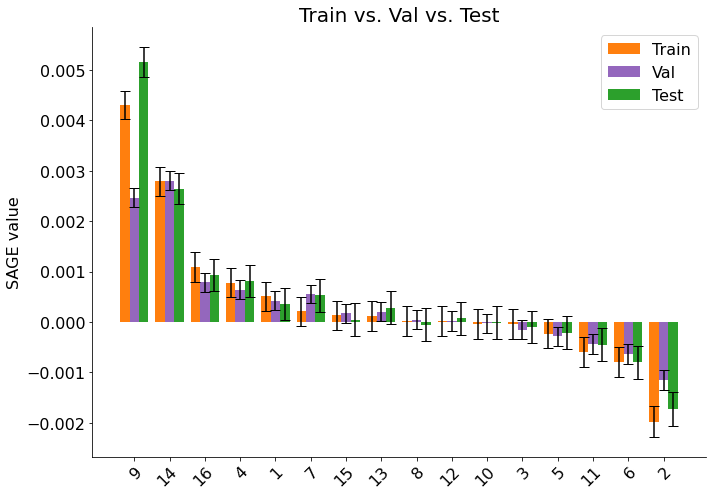

In [ ]:
comparison_plot((sage_train, sage_val, sage_test),
                     ('Train', 'Val', 'Test'),
                     feature_names,
                     colors=('tab:orange', 'tab:purple', 'tab:green'),title='Train vs. Val vs. Test')

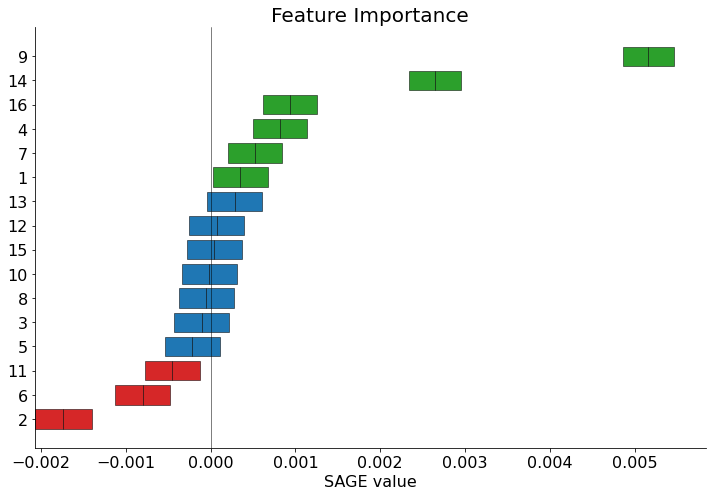

In [ ]:
sage_test.plot_sign(feature_names, title=r'Feature Importance')